# Código em Python para o Método de Mínimos Quadrados 

Esse notebook jupyter implementa usando a linguagem python o método de mínimos quadrados 
para resolver um problema de valor de contorno de uma EDO. 

**Módulos usados nesse notebook**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp 
from sympy import (symbols, diff, integrate, lambdify, symbols, 
                   Eq, solve, dsolve, Function, Matrix, sin, cos, exp,
                   init_printing)
import numpy.linalg as la  
init_printing(use_latex=True)


**Exércicio :** Resolver  o seguinte PVC 

$$\dfrac{d^2u}{dx^2} + u = x   \ \ \textrm{com } \ \ u(0) = 0, u(1) = 0$$


**Código Numérico**

A matriz A é simétrica e positiva definida.


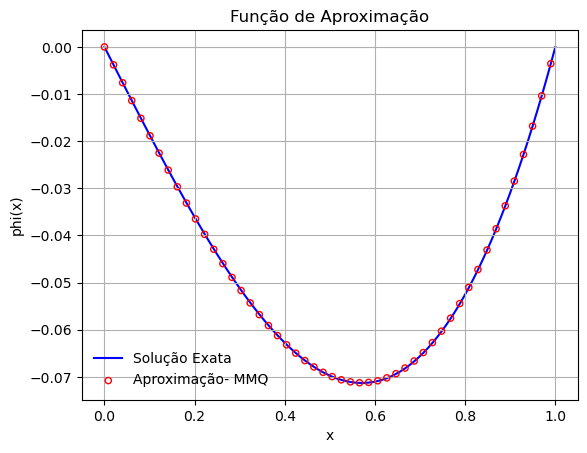

In [31]:
"""
Descrição : Vamos resolver o problema de valor de contorno 
usando o método de minimos quadrados.
===============================================================
programador : Marcelo Almeida

"""


# criando a função para o operador L de segunda ordem 

def L(phi) : 
    """
    funlção que calcular o operador L sobre 
    cada função de aproximação phi. 
    """ 
    a_x = 1 # termo da segunda derivada 
    b_x = 0  # termo da primeira derivada
    c_x = 1  # termo da função 
    
    L_un = a_x*diff(phi,x,2) + b_x *diff(phi,x,1) + c_x * phi
    return L_un 


# criando a função para verificar se 
# uma matriz é simetrica
def is_symmetric(A):
    """
    Verifica se a matriz A é simétrica.
    """
    return np.allclose(A, A.T)

# criando uma função para 
# verificar se é positiva definida 

def is_positive_definite(A): 
    """
    verific se a matriz A é definda possitiva 
    """
    
    autovalores = la.eigvals(A)
    
    # teste de verificação 
    
    if (autovalores > 0).all() : 
        
        return True 
    else : 
        
        return False 


## =========== função principal ================ ##  

if __name__ == "__main__" : 
    
    x = symbols('x', real = True)
    
    ## solução analitica : 
    u = Function("u")(x)

    # criando a equação diferencial 
    eq_edo = Eq(diff(u,x,2) + u, x)

    # criando as condições de contorno como dicionarios 
    pvc = {u.subs(x,0) : 0, 
        u.subs(x,1) : 0}

    # resolvendo a equação diferencial :
    sol_analitic = dsolve(eq_edo,u, ics=pvc)
    
    # criando a nossa funçções de base 
    n = 3        # quantidade de termos usados 
    a , b = 0, 1 # intervalo de integração
    lista_phi_j = [x**(i)*(1 - x)  for i in range(1,n+1)] # lista de funções phi 
    h_x = x      # função fonte 
    # criando o sistema de equações :
    A = np.empty((n,n), dtype= np.float64)
    b = np.empty((n,1), dtype=np.float64)
    
    # criando a matriz 
    for i in range(n) : 
        
        for j in range(n) : 
            
            phi_i = L(lista_phi_j[i])  # operador L{phi_i(x)}
            phi_j = L(lista_phi_j[j])  # operador L{phi_j(x)}
            integrando = integrate(phi_i*phi_j, (x, 0, 1)).evalf() 
            A[i,j] = np.float64(integrando)
            
            
    # criando o vetor b : 
    for i in range(n) : 
        
        phi_i = L(lista_phi_j[i])
        term = integrate(phi_i*h_x,(x,0,1))
        b[i] = np.float64(term)
        
        
    # vericando se a matriz é simétrica e positiva definida
    if is_symmetric(A) and is_positive_definite(A):
        print("A matriz A é simétrica e positiva definida.")
        
        # resolve usando a decomposição de cholesky 
        L = la.cholesky(A)
        y = la.solve(L,b)
        ci = la.solve(L.T,y)
        

        
    else:
        print("A matriz A não é simétrica ou não é positiva definida.")
        # resolve usando a decomposição LU
        P, L, U = la.lu(A)
        y = la.solve(L, b)
        ci = la.solve(U, y)
        
    # criando a função de aproximação
    phi = sum(ci[i] * lista_phi_j[i] for i in range(n))
   
    
    # ploteando a função de aproximação
    x_vals = np.linspace(0, 1, 100)
    sol_analitic = lambdify(x,sol_analitic.rhs,"numpy")
    u_analtic = sol_analitic(x_vals)
    phi_func = lambdify(x, phi[0], 'numpy')
    y_vals = phi_func(x_vals)
    plt.plot(x_vals,u_analtic, "-b", label = "Solução Exata",
             zorder = 1)
    plt.scatter(x_vals[::2], y_vals[::2], facecolors = "none", edgecolors = "r",label='Aproximação- MMQ',
                s=20, zorder = 2)
    plt.title('Função de Aproximação')
    plt.xlabel('x')
    plt.ylabel('phi(x)')
    plt.legend(frameon = False , loc = 0)
    plt.grid()
    plt.show()
    
            
            
    
    